In [1]:
import numpy as np
import pandas as pd
from scipy import stats, optimize, interpolate, integrate
import matplotlib.pyplot as plt

 - https://www.wolframalpha.com/input?i=int%28%28k%2F%281%2B%28%28k-n%29%2Fn%29*exp%28-r*t%29%29%29%2C+r%29

In [2]:
def logistic(t, r=1.0, N0=1e3, K=1e7):
    term = np.exp(r*t)
    return K*N0*term/(K + N0*(term - 1))

In [3]:
normal = stats.norm(scale=0.3, loc=1.0)

In [4]:
def _moment(r, t, k, law=normal):
    return np.power(logistic(t, r=r), k)*law.pdf(r)

In [5]:
@np.vectorize
def moment(k, t, rmin=0, rmax=5):
    return integrate.quad(_moment, rmin, rmax, args=(t, k), epsrel=1e-10)[0]

In [6]:
def skewness(t):
    mu = moment(1, t)
    sigma = np.sqrt(moment(2, t) - mu**2)
    skew = (moment(3, t) - 3*mu*sigma**2 - mu**3)/sigma**3
    return skew

In [7]:
t = np.linspace(0, 20, 300)
s = skewness(t)

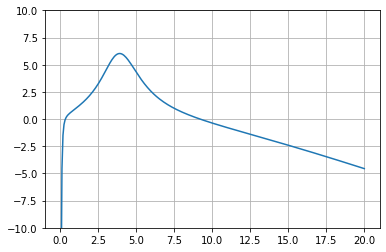

In [10]:
fix, axe = plt.subplots()
axe.plot(t, s)
axe.set_ylim([-10, 10])
axe.grid()